In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
dataset = pd.read_json('../data/raw/company_info.jsonl', lines=True)
# Stel de eerste rij in als kolomnamen
dataset.columns = dataset.iloc[0]

# Verwijder de eerste rij (die nu als kolomnamen is ingesteld)
dataset = dataset[1:]

# Herstel de index van de DataFrame
dataset = dataset.reset_index(drop=True)
dataset = dataset.dropna()

In [41]:
selected_columns = ['start_year', 'nace1', 'nace2', 'nace3', 'nace4', 'capital', 'company_type']
numeric_data = dataset[selected_columns]

# Stap 2: Verwijder of vul eventuele ontbrekende waarden (NaN) in
numeric_data = numeric_data.dropna()  # Verwijdert rijen met NaN-waarden

In [42]:
# Stap 3: Standaardiseer de gegevens
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)

In [43]:
# Reduceer de data naar 2 dimensies met PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [46]:
n_clusters = 2  # Stel het gewenste aantal clusters in
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_pca)
labels_pca = kmeans.labels_

c:\Users\fwi11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


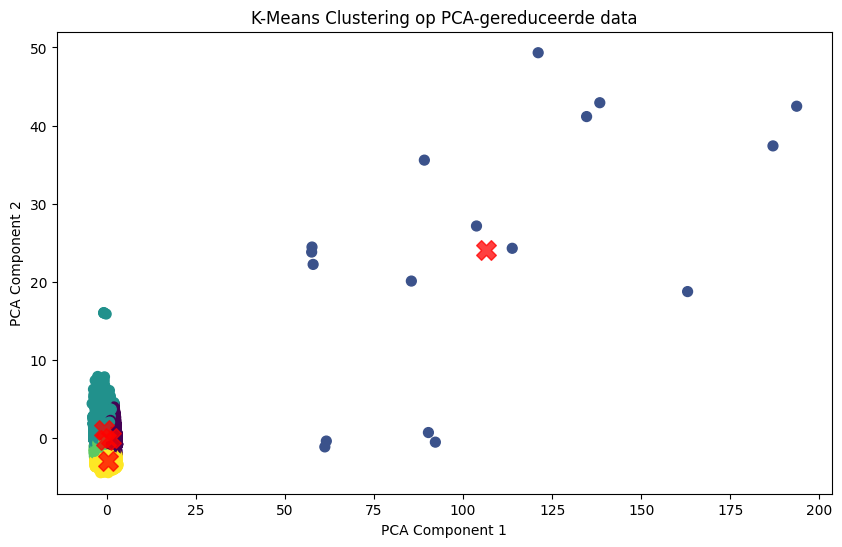

In [47]:
# Visualiseer de clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering op PCA-gereduceerde data')
plt.show()

In [51]:
# Stel dat X_pca de getransformeerde gegevens zijn na het toepassen van PCA
pca_components = pd.DataFrame(X_pca, columns=['PCA_Component_1', 'PCA_Component_2'])
print (pca_components)

        PCA_Component_1  PCA_Component_2
0              1.331373         0.182425
1             -0.360533        -0.011211
2              1.040672        -0.281056
3             -0.684297        -0.535570
4              0.353330         0.011007
...                 ...              ...
236455         0.055145        -0.384326
236456         1.219268        -0.738311
236457        -0.226171         0.309791
236458        -0.839256         0.268109
236459         1.494974        -2.940685

[236460 rows x 2 columns]


C:\Users\fwi11\AppData\Local\Temp\ipykernel_18576\3564645737.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(filtered_data['PCA_Component_1'], filtered_data['PCA_Component_2'], s=50, cmap='viridis')


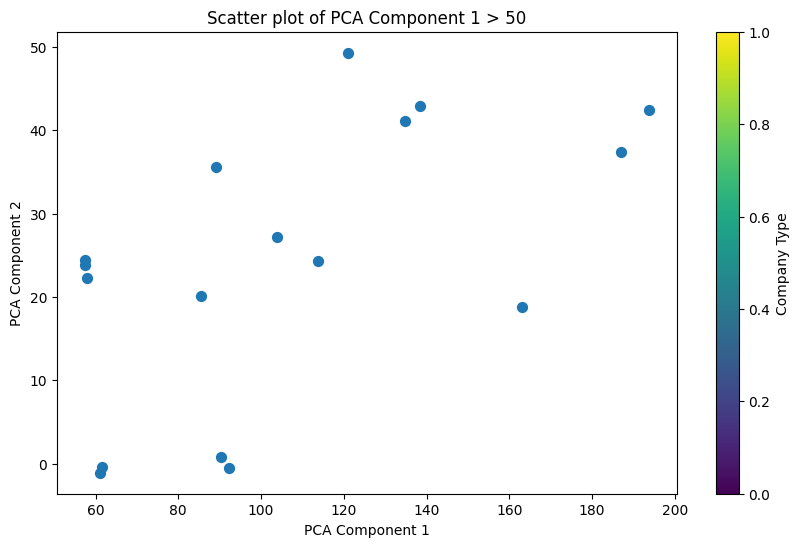

In [53]:
#Filter de data waarbij PCA_Component_1 groter is dan 50
filtered_data = pca_components[pca_components['PCA_Component_1'] > 50]

# Maak een scatter plot van de gefilterde data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['PCA_Component_1'], filtered_data['PCA_Component_2'], s=50, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter plot of PCA Component 1 > 50')
plt.colorbar(label='Company Type')
plt.show()

In [58]:
original_data_approx = pca.inverse_transform(filtered_data)

original_columns = ['start_year', 'nace1', 'nace2', 'nace3', 'nace4', 'capital', 'company_type']  # Gebruik hier de namen van je originele kolommen
filtered_original_data = pd.DataFrame(original_data_approx, columns=original_columns)

print(filtered_original_data.head(20))

    start_year      nace1       nace2       nace3      nace4   capital  \
0    -5.843049  46.355244   61.500052   66.595338  54.801345  1.380555   
1     8.740463  39.767715   45.070213   50.563287  43.546840 -0.090639   
2   -10.746635  78.711313  104.888601  113.473102  93.260799  2.420680   
3    -5.729648  34.514600   46.562056   50.243343  41.150916  1.155768   
4   -16.750078  54.208161   77.463804   82.613301  66.584876  2.533816   
5   -23.141554  45.526929   70.131967   73.716610  58.208792  2.969246   
6    -8.931946  41.459012   57.076411   61.331200  49.947174  1.578311   
7   -10.099969  21.981793   33.261620   35.079961  27.834396  1.334124   
8   -15.852018  52.857458   75.264857   80.325257  64.804615  2.426117   
9     9.827931  40.827725   45.793772   51.502967  44.492195 -0.172272   
10    3.210571  69.011735   84.899508   93.456637  78.583966  0.951231   
11  -16.513182  33.626067   51.475473   54.170319  42.846883  2.139390   
12    6.582070  27.274533   30.582754 